In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

# TASK 1

In [10]:
import cv2 as cv
cap = cv.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam")
else:
    ret, frame = cap.read()
    if ret:
        flipframe = cv.flip(frame, 1)
        cv.imwrite("captured_img.jpg", flipframe)
        print("Image captured and saved as 'captured_img.jpg'")
    else:
        print("Error capturing image")
    cv.imshow("Captured Image", flipframe)
    cv.waitKey(0)
    cap.release()
    cv.destroyAllWindows()

Image captured and saved as 'captured_img.jpg'


In [11]:
img=cv.imread("captured_img.jpg")

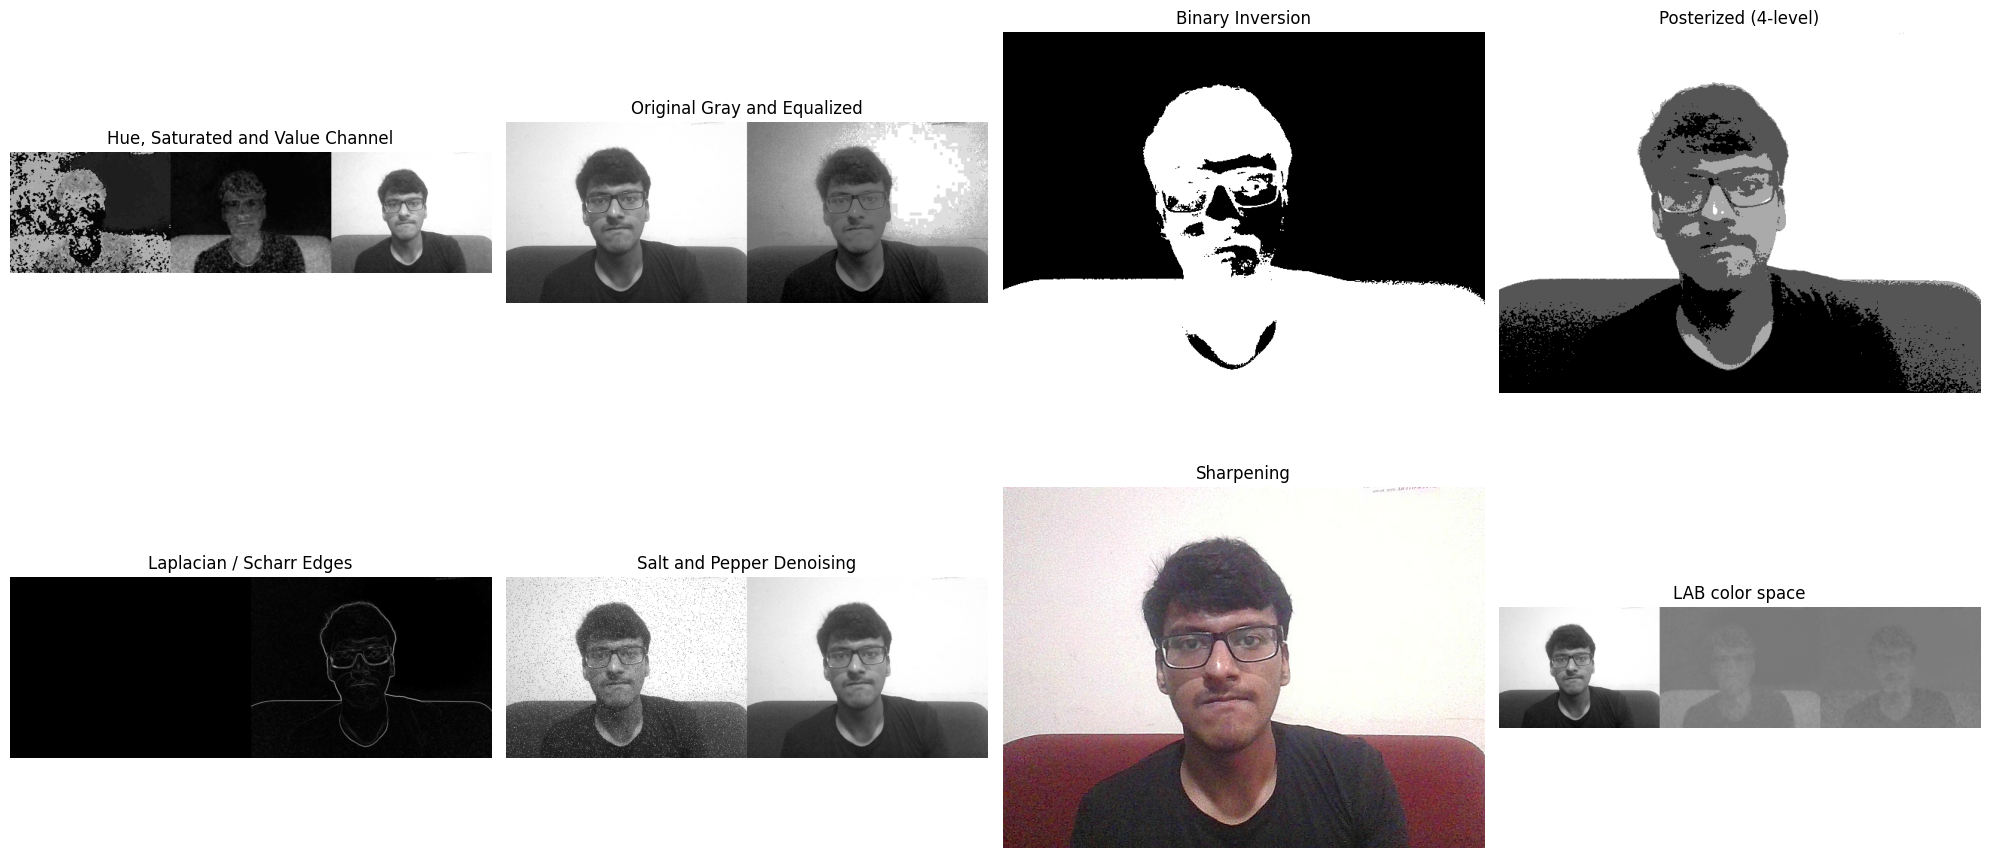

In [13]:
def hsv_split(img):
    hsv= cv.cvtColor(img, cv.COLOR_BGR2HSV)
    h, s, v=cv.split(hsv)
    return h,s,v

def histogram_equalization(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    eq = cv.equalizeHist(gray)
    return gray, eq

def binary_inversion(img):
    threshold_value = 127
    max_value = 255
    gray=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, binary= cv.threshold(gray, threshold_value, max_value, cv.THRESH_BINARY_INV)
    return binary

def posterize(img):
    #dividing 256 levels in to 4 bins i.e. into 4 evenly spaced intensity levels
    #0-63: bin 0      64-127: bin 1    128-191: bin 3    192-255: bin 4
    # and then rescling back to 0-255 range : (255/(4-1)=85) :: [0,85,170,255]
    gray=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    posterized=(gray//64)*85
    return posterized

def edge_detection(img):
    gray=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    blurred_image = cv.GaussianBlur(gray, (3, 3), 0)

    # Apply the Laplacian operator
    laplacian = cv.Laplacian(blurred_image, cv.CV_64F)
    # Convert the result to 8-bit (0-255) range

    laplacian_abs = cv.convertScaleAbs(laplacian)


    # Apply Scharr operator to find the x and y gradients
    Gx = cv.Scharr(gray, cv.CV_64F, 1, 0)
    Gy = cv.Scharr(gray, cv.CV_64F, 0, 1)
    
    # Compute the gradient magnitude
    gradient_magnitude = cv.magnitude(Gx, Gy)
    return laplacian_abs,gradient_magnitude

def median_filter_denoise(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    noisy = gray.copy()
    h, w = gray.shape
    num_noise = int(h * w * 0.05)

    for _ in range(num_noise):
        i = random.randint(0, h - 1)
        j = random.randint(0, w - 1)
        noisy[i, j] = 255 if random.random() < 0.5 else 0

    denoised = cv.medianBlur(noisy, 3)
    return noisy, denoised

def unsharp_masking(img):
    amount=1.5
    blur_ksize=(5,5)
    sigma=1.0
    blur = cv.GaussianBlur(img, blur_ksize, sigma)
    sharpened = cv.addWeighted(img, 1+amount, blur, -amount, 0)
    return sharpened

def convert_to_lab(img):
    lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)
    l, a, b = cv.split(lab)
    return l, a, b
#LAB is a three-dimensional, device-independent color space with axes for lightness (L*), green–red (a*), and blue–yellow (b*)
#It separates brightness from color, is widely used for accurate color measurement, and covers all colors visible to humans.
#The L* channel looks like a black-and-white image, containing all the brightness information
#The a* channel visualizes red vs. green; the b* channel visualizes yellow vs. blue.
#Color axis::   L: brightness only, no colour     a: red-positive, green-negative    b: blue-negative, yellow-positive

def display_results(results):
    titles = [
        'Hue, Saturated and Value Channel',
        'Original Gray and Equalized',
        'Binary Inversion', 'Posterized (4-level)',
        'Laplacian / Scharr Edges',
        'Salt and Pepper Denoising','Sharpening','LAB color space'
    ]

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    for i, (title, images) in enumerate(zip(titles, results)):
        ax = axes[i//4, i%4] #rows-i//4 and columns-i%4
        if isinstance(images, tuple):
            # Combine side by side
            combined = np.hstack(images)
            cmap = 'gray' if len(combined.shape) == 2 else None
        else:
            combined = images
            cmap = 'gray' if len(combined.shape) == 2 else None
        ax.imshow(combined, cmap=cmap)
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Convert image from BGR to RGB for consistent display
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Run all processing steps
h, s, v = hsv_split(img)
gray, eq = histogram_equalization(img)
binary = binary_inversion(img)
poster = posterize(img)
lap, scharr = edge_detection(img)
noisy, denoised = median_filter_denoise(img)
sharpened = unsharp_masking(img_rgb)
l, a, b = convert_to_lab(img)

# Display results
display_results([
    (h, s, v),
    (gray, eq),
    binary,
    poster,
    (lap, scharr),
    (noisy, denoised),
    sharpened,
    (l, a, b)
])